In [25]:
# general python packages
import numpy as np
import matplotlib.pyplot as plt
import sacc
import pyccl as ccl
import time

# tjpcov packages
from tjpcov.covariance_calculator import CovarianceCalculator
from tjpcov.covariance_cluster_counts_ssc import ClusterCountsSSC

# plotting settings
%matplotlib inline
plt.rcParams['xtick.labelsize'] = 13.
plt.rcParams['ytick.labelsize'] = 13.
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top']       = True
plt.rcParams['ytick.right']     = True

# Cluster count covariance: validation

<br>
<font size="4">
The Gaussian and SSC terms of the number count covariance computed by TJPCov are validated against the corresponding predictions from an external code.
</font>
<br>
<br>
<font size="4">
The reference external code has been validated against simulations in Fumagalli et al. 2021 (arXiv:2102.08914). The code is based on Hu$\&$Kravtsov 2001 model (arXiv:astro-ph/0203169v1), and adapted to lightcone geometry  in Costanzi+19 (arXiv:1810.09456v1)
</font>

### Generate SACC File

In [26]:
survey_name = "NC_mock_redshift_richness"
area = 5000.0
s_count = sacc.Sacc()
s_count.add_tracer("survey", survey_name, area)

# Define bin information
bin_info = [
    {'name': 'bin_z_0', 'lower': 0.20000240679472392, 'upper': 0.27500177702032774},
    {'name': 'bin_z_1', 'lower': 0.27500177702032774, 'upper': 0.35000114724593157},
    {'name': 'bin_z_2', 'lower': 0.35000114724593157, 'upper': 0.42500051747153533},
    {'name': 'bin_z_3', 'lower': 0.42500051747153533, 'upper': 0.49999988769713916},
    {'name': 'bin_z_4', 'lower': 0.49999988769713916, 'upper': 0.574999257922743},
    {'name': 'bin_z_5', 'lower': 0.574999257922743, 'upper': 0.6499986281483467},
    {'name': 'bin_rich_0', 'lower': 0.8685892469619315, 'upper': 1.2078890373785933},
    {'name': 'bin_rich_1', 'lower': 1.2078890373785933, 'upper': 1.547188827795255},
    {'name': 'bin_rich_2', 'lower': 1.547188827795255, 'upper': 1.8864886182119167}
]

# Add bin tracers
for bin_data in bin_info:
    s_count.add_tracer("bin_z" if "bin_z" in bin_data['name'] else "bin_richness",
                       bin_data['name'], bin_data['lower'], bin_data['upper'])
cc = sacc.standard_types.cluster_counts
mlm = sacc.standard_types.cluster_mean_log_mass
# Define cluster counts and mean log mass data
data_points = [
    (cc, ('bin_rich_0', 'bin_z_0'), 35142),
    (cc  , ('bin_rich_0', 'bin_z_1'), 6361),
    (cc  , ('bin_rich_0', 'bin_z_2'), 160),
    (cc  , ('bin_rich_0', 'bin_z_3'), 53273),
    (cc  , ('bin_rich_0', 'bin_z_4'), 9136),
    (cc  , ('bin_rich_0', 'bin_z_5'), 228),
    (cc  , ('bin_rich_1', 'bin_z_0'), 71499),
    (cc  , ('bin_rich_1', 'bin_z_1'), 11747),
    (cc  , ('bin_rich_1', 'bin_z_2'), 265),
    (cc  , ('bin_rich_1', 'bin_z_3'), 88108),
    (cc  , ('bin_rich_1', 'bin_z_4'), 13841),
    (cc  , ('bin_rich_1', 'bin_z_5'), 309),
    (cc  , ('bin_rich_2', 'bin_z_0'), 102306),
    (cc  , ('bin_rich_2', 'bin_z_1'), 15722),
    (cc  , ('bin_rich_2', 'bin_z_2'), 278),
    (cc  , ('bin_rich_2', 'bin_z_3'), 114798),
    (cc  , ('bin_rich_2', 'bin_z_4'), 16761),
    (cc  , ('bin_rich_2', 'bin_z_5'), 310),
    (mlm, ('bin_rich_0', 'bin_z_0'), 13.4075),
    (mlm, ('bin_rich_0', 'bin_z_1'), 13.7930),
    (mlm, ('bin_rich_0', 'bin_z_2'), 14.3036),
    (mlm, ('bin_rich_0', 'bin_z_3'), 13.4047),
    (mlm, ('bin_rich_0', 'bin_z_4'), 13.7661),
    (mlm, ('bin_rich_0', 'bin_z_5'), 14.3080),
    (mlm, ('bin_rich_1', 'bin_z_0'), 13.3987),
    (mlm, ('bin_rich_1', 'bin_z_1'), 13.7474),
    (mlm, ('bin_rich_1', 'bin_z_2'), 14.2155),
    (mlm, ('bin_rich_1', 'bin_z_3'), 13.3920),
    (mlm, ('bin_rich_1', 'bin_z_4'), 13.7302),
    (mlm, ('bin_rich_1', 'bin_z_5'), 14.2325),
    (mlm, ('bin_rich_2', 'bin_z_0'), 13.3862),
    (mlm, ('bin_rich_2', 'bin_z_1'), 13.7171),
    (mlm, ('bin_rich_2', 'bin_z_2'), 14.1222),
    (mlm, ('bin_rich_2', 'bin_z_3'), 13.3796),
    (mlm, ('bin_rich_2', 'bin_z_4'), 13.6876),
    (mlm, ('bin_rich_2', 'bin_z_5'), 14.1026),
]

# Add data points
for data_type, (bin_richness_label, bin_z_label), value in data_points:
    s_count.add_data_point(data_type, (survey_name, bin_richness_label, bin_z_label), value)

#Add covariance
cov = [3.5142e4, 6.361e3, 1.6e2, 5.3273e4, 9.136e3, 2.28e2, 7.1499e4, 1.1747e4, 2.65e2, 8.8108e4, 1.3841e4, 3.09e2, 1.02306e5,  1.5722e4,  2.78e2, 1.14798e5, 1.6761e4, 3.1e2, 2.59949557e-6, 2.90651791e-05, 9.43896703e-04, 1.68357584e-06, 1.92845101e-05,  7.04260444e-04, 1.22804096e-06, 1.48490066e-05, 7.29613214e-04, 9.67117735e-07, 1.20824143e-05, 6.20407091e-04, 8.10018388e-07, 1.03367315e-05, 6.39281417e-04,  7.02045729e-07, 9.33062031e-06, 6.01163806e-04]
s_count.add_covariance(np.diag(cov))


# Finalize and save
s_count.to_canonical_order()
s_count.save_fits("./clusters/cluster_redshift_richness.sacc", overwrite=True)


In [27]:
s_right = sacc.Sacc.load_fits("./clusters/cluster_redshift_richness.sacc")
for i in range(len(s_right.data)):
    print(s_right.data[i])
    print(s_count.data[i])
print(s_right.tracers['NC_mock_redshift_richness'].__dict__)

DataPoint(data_type='cluster_counts', tracers=(np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), value=35142, )
DataPoint(data_type='cluster_counts', tracers=('NC_mock_redshift_richness', 'bin_rich_0', 'bin_z_0'), value=35142, )
DataPoint(data_type='cluster_counts', tracers=(np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_1')), value=6361, )
DataPoint(data_type='cluster_counts', tracers=('NC_mock_redshift_richness', 'bin_rich_0', 'bin_z_1'), value=6361, )
DataPoint(data_type='cluster_counts', tracers=(np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_2')), value=160, )
DataPoint(data_type='cluster_counts', tracers=('NC_mock_redshift_richness', 'bin_rich_0', 'bin_z_2'), value=160, )
DataPoint(data_type='cluster_counts', tracers=(np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_3')), value=53273, )
DataPoint(data_type='cluster_counts', tracers=('NC_mock_redshift_richness', 'bi

In [28]:
# read redshift bins, richness bins and survey area from the config file
INPUT_YML = "./clusters/conf_covariance_clusters.yaml"
cc_cov    = ClusterCountsSSC(INPUT_YML)
zbins     = cc_cov.z_bins
lbins     = cc_cov.richness_bins
Omega_sky = cc_cov.survey_area
print(lbins)

# plot for covariance comparison
zbins_m = (zbins[1:]+zbins[:-1])/2
xtk_zl = []
for i in range(len(lbins)-1):
    for j in range(len(zbins_m)):
        xtk_zl += [zbins_m[j]]

xtk_zl = np.append(xtk_zl,zbins[-1])
xtk_zl = np.round(np.array(xtk_zl),2)

nl     = len(lbins)-1
nz     = len(zbins)-1
len_nc = nz * nl



# plot for comparing the tjpcov covariance to the reference covariance from an external code 
def comparison_plot_func(cov_ref, cov, cvec, title, label):

    fig = plt.figure(figsize=(10,8))
    ax0 = fig.add_axes([0.2, 0.3, 0.6, 0.6],xticklabels=[])
    ax1 = fig.add_axes([0.2, 0.10, 0.6, 0.2])

    plt.sca(ax0)
    
    plt.plot(np.diag(cov_ref,k=0), 'X',c=cvec[0],mec='k',ms=8, label=label[0])
    plt.plot(np.diag(cov,k=0),lw=2.,c=cvec[1],label=label[1])

    if len(cvec)>2:
        plt.plot(np.diag(cov_ref,k=1), 'X',c=cvec[2],mec='k',ms=8, label=label[2])
        plt.plot(np.diag(cov,k=1),lw=2.,c=cvec[3],label=label[3]) 
                
    plt.axhline(0., c='k', ls='--',lw=1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
    plt.legend(loc=0,fontsize=12.5)
    plt.title(title,fontsize=18)
    plt.ylabel(r'Covariance', fontsize=15)

    plt.xticks(np.linspace(0,len_nc,len(lbins)),[])
    plt.xticks(np.linspace(0,len_nc,len(xtk_zl)),[], minor=True);


    plt.sca(ax1)

    diff = (np.diag(cov,k=0)/np.diag(cov_ref,k=0) - 1)*100
    plt.plot(diff, lw=2., c=cvec[1])
    if len(cvec)>2:
        diff = (np.diag(cov,k=1)/np.diag(cov_ref,k=1) - 1)*100
        plt.plot(diff, lw=2., c=cvec[3])
         
    plt.axhline(0., c='k',ls='--',lw=1)
    plt.ylabel(r'$\Delta$C/C$_{\rm ref}$ (%)', fontsize=15)
    plt.xticks(np.linspace(0,len_nc,len(lbins)),lbins.astype(int),fontsize=15,rotation=0)
    plt.xticks(np.linspace(0,len_nc,len(xtk_zl)),xtk_zl, minor=True,fontsize=10,rotation=45);
    plt.xlabel(r'Richness & redshift bins', fontsize=15)


0.20000240679472392 [0.20000241 0.27500178 0.35000115 0.42500052 0.49999989 0.57499926
 0.64999863] 0.07499937022560381
[0.86858925 1.20788904 1.54718883 1.88648862]


# Gaussian covariance  (i.e. shot-noise)
<br>
\[
\Large{
{\rm Gauss}_{ij} =  \langle N\rangle(\Delta z_i,\Delta \lambda_i)\,\langle N \rangle(\Delta z_j,\Delta \lambda_j) \, \delta^{\rm D}_{ij}
}
\]
<font size="4">with:</font><br><br>
<font size="4">- expected number of clusters:</font><br><br>
\[
\large{
\langle N\rangle(\Delta z_i,\Delta \lambda_i) = \int_0^\infty {\rm d}z \, \dfrac{{\rm d}V}{{\rm d}z} (z, \Delta z_i)\,\int_0^\infty {\rm d}M\, n(M,z)\,\int_{\Delta \lambda_i} {\rm d}\lambda^{\rm ob} \, P(\lambda^{\rm ob} | M,z)
}
\]
<br>
<font size="4">- observed volume element:</font><br><br>
\[
\large{
\dfrac{{\rm d}V}{{\rm d}z} (z, \Delta z_i) = \Omega_{\rm mask}\,\frac{{\rm d}V}{{\rm d}z\,{\rm d}\Omega}(z)\,\int_{\Delta z_i} {\rm d}z^{\rm ob}\,P(z^{\rm ob} | z)
}
\]
<br>

# Super-sample covariance
<br>
\[
\Large{
\begin{align}
SSC_{ij} = \,& \int_o^\infty dz\,\frac{{\rm d}V}{{\rm d}z}(z,\Delta z_i)\,D(z)\,\langle Nb\rangle(z,\Delta \lambda_i)  \, \times  \\
 & \int_o^\infty dz'\,\frac{{\rm d}V}{{\rm d}z}(z', \Delta z_j)\,D(z')\,\langle Nb\rangle(z',\Delta \lambda_j) \ \ \sigma^2(z,z')
\end{align}
}
\]
<br><br><br>
<font size="4">with:</font><br><br>
<font size="4">- number counts times halo bias:</font><br><br>
<br>
\[
\large{
\langle Nb\rangle(z,\Delta \lambda_i) = \int_0^\infty {\rm d}M\, n(M,z)\,b(M,z)\,\int_{\Delta \lambda_i} {\rm d}\lambda^{\rm ob} \, P(\lambda^{\rm ob} | M,z)
}
\]
<br>
<font size="4">- sample covariance:</font><br><br>
\[
\Large{
\sigma^2(z,z') = \int \frac{d^3 k}{(2\pi)^3}\, P_0(k) \ W(kr_z) \ W^*(kr_{z'})
}
\]
<br>
<font size="4">- window function (angle-averaged spherical harmonic expansion of $e^{ikr}$ ):</font><br><br>
\[
\Large{
W(kr_z) = 4\pi\,\sum_{\ell=0}^\infty (i)^\ell\,j_\ell(kr_z)\,Y_{\ell 0}(\hat{k})\,K_\ell
}
\]
<br>
\[
K_\ell =
\large{
\begin{cases}
\frac{1}{2\sqrt{\pi}} \quad && {\rm for}\quad  l=0 \\ 
\sqrt{\frac{\pi}{2l+1}}\frac{P_{l-1}(\cos(\theta_s))-P_{l+1}(\cos(\theta_s))}{\Omega_{\rm mask}} \quad && {\rm for}\quad  l\neq 0  
\end{cases}
}
\]

<br>
<br>
<br>
<font size="4">Full-sky approx: $\ell = 0$</font><br>
<font size="4">Partial-sky model: $\ell = 0, ..., \infty$ (good approx: $\ell = 0, ..., 20$) </font><br><br>

### RESHAPE: The two redshift integrations are actually independent and can thus be separated. Furthermore, we can simplify the computation by considering the redshift-averaged window functions 
<br>
<br>
\[
\Large{
SSC_{ij} =  \langle Nb\rangle(\Delta z_i,\Delta \lambda_i)\,\langle Nb \rangle(\Delta z_j,\Delta \lambda_j) \int \frac{d^3 k}{(2\pi)^3}\, P_0(k) \sum_\ell W^i_\ell (k)\,W^j_\ell(k)
}
\]
<font size="4">with</font><br><br>
<font size="4">- number count times halo bias:</font><br><br>
<br>
\[
\large{
\langle Nb\rangle(\Delta z_i,\Delta \lambda_i) = \int_0^\infty {\rm d}z \, \dfrac{{\rm d}V}{{\rm d}z} (z, \Delta z_i)\,\int_0^\infty {\rm d}M\, n(M,z)\,b(M,z)\,\int_{\Delta \lambda_i} {\rm d}\lambda^{\rm ob} \, P(\lambda^{\rm ob} | M,z)
}
\]

<br>
<font size="4">- redshift shell window function (with lightcone geometry):</font><br><br>
\[
\large{
W^i_\ell(k) = \dfrac{1}{V_i}\,\int_0^\infty {\rm d}z \, \dfrac{{\rm d}V}{{\rm d}z} (z, \Delta z_i)\,D(z)\,\bigg[4\pi\,j_\ell(k\,r_z)\,K_\ell \bigg]
}
\]
<br>

# Load covariance generated by the external code (reference for validation)
<font size="4">External code validated against simulations in Fumagalli+21 (arXiv:2102.08914v1).</font><br><br>

In [17]:
# partial-sky model, sigma_z=0.005 (DES Y1 photoz)
ref_cov = np.load('./clusters/ref_cov_partialsky_sigmaz0.005.npz')
cov_ref_gauss_005 = ref_cov['sn']
cov_ref_ssc_005   = ref_cov['ssc']

# partial-sky model, sigma_z=0.05 (large photo-z)
ref_cov = np.load('./clusters/ref_cov_partialsky_sigmaz0.05.npz')
cov_ref_gauss_05 = ref_cov['sn']
cov_ref_ssc_05   = ref_cov['ssc']

# full-sky model, sigma_z=0.005 (DES Y1 photoz)
ref_cov = np.load('./clusters/ref_cov_fullsky_sigmaz0.005.npz')
cov_ref_gauss_full_005 = ref_cov['sn']
cov_ref_ssc_full_005   = ref_cov['ssc']

## Partial-sky exact model vs full-sky approximation
<font size="4"> The previous version of the TJPCov code relied on full-sky approximation for describing the super-sample covariance. </font><br><br>
<font size="4">The super-sample covariance depends on the size and geometry of the survey; thus, the full-sky approximation is not a good approximation, as it underestimates the sample variance effect.</font><br><br>

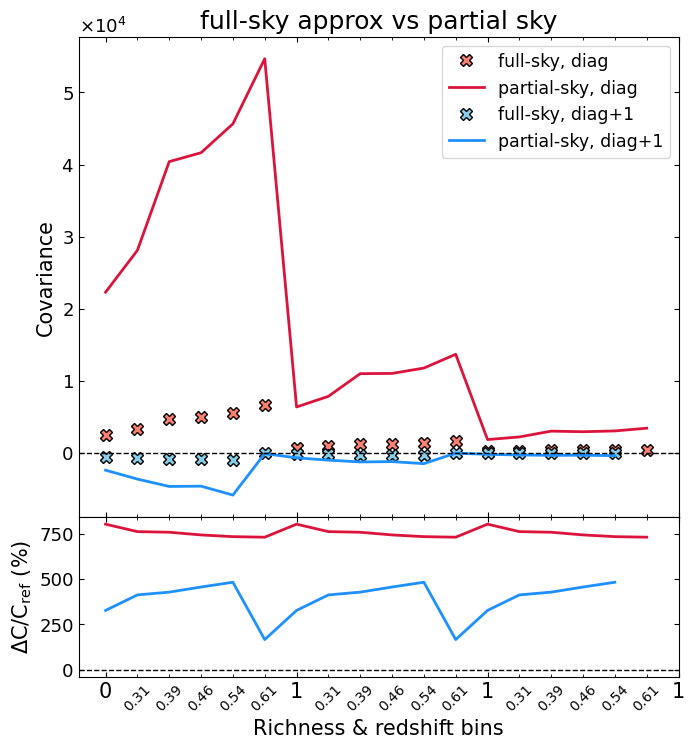

In [18]:
comparison_plot_func(cov_ref_ssc_full_005, cov_ref_ssc_005,  
                     cvec  = ['salmon','crimson', 'skyblue','dodgerblue'], 
                     title = r'full-sky approx vs partial sky' , 
                     label = ['full-sky, diag', 'partial-sky, diag', 'full-sky, diag+1', 'partial-sky, diag+1'])

# Note: the labels "diag" and "diag+1" refer to the diagonal and first off-diagonal (w.r.t. redshifts bins)
# elements of the matrix, respectively.

# Run TJPCOV (new version)  for computing the covariance terms
<font size="4">The new version of the code accounts for the actual size of the survey (no full-sky approximation).<br>Computing time ~ 30-60 sec (for 6 redshift bins, 3 richness bins).</font><br><br>


In [19]:
# compute covariance terms from the covariance class (and save results in a .sacc file)
st = time.time()
cc = CovarianceCalculator("./clusters/conf_covariance_clusters.yaml")
cc.config['photo-z']['sigma_0'] = 0.05

cov_terms     = cc.get_covariance_terms()
sacc_with_cov = cc.create_sacc_cov(output="test_cov_new_05.sacc", save_terms=True)
print('Time: ', (time.time()-st), ' sec')


st = time.time()
cc = CovarianceCalculator("./clusters/conf_covariance_clusters.yaml")
cc.config['photo-z']['sigma_0'] = 0.005

cov_terms     = cc.get_covariance_terms()
sacc_with_cov = cc.create_sacc_cov(output="test_cov_new_005.sacc", save_terms=True)
print('Time: ', (time.time()-st), ' sec')

0.20000240679472392 [0.20000241 0.27500178 0.35000115 0.42500052 0.49999989 0.57499926
 0.64999863] 0.07499937022560381
0.20000240679472392 [0.20000241 0.27500178 0.35000115 0.42500052 0.49999989 0.57499926
 0.64999863] 0.07499937022560381
Computing independent covariance blocks
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_1'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_2'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_3'))
Rank None: (np.s

/sps/lsst/users/ebarroso/TJPCov/tjpcov/covariance_io.py:93: UserWarning: Output file ./clusters/test_cov_new_05.sacc already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(
/sps/lsst/users/ebarroso/TJPCov/tjpcov/covariance_io.py:93: UserWarning: Output file ./clusters/test_cov_new_05_gauss.sacc already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(
/sps/lsst/users/ebarroso/TJPCov/tjpcov/covariance_io.py:93: UserWarning: Output file ./clusters/test_cov_new_05_SSC.sacc already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(


Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_1'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_2'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_3'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_4'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_5'))
Rank None: (np.str_('NC_mock_redshift_richness'), np.str_('bin_rich_0'), np.str_('bin_z_0')), (np.str_('NC_mock_redshift

/sps/lsst/users/ebarroso/TJPCov/tjpcov/covariance_io.py:93: UserWarning: Output file ./clusters/test_cov_new_005.sacc already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(
/sps/lsst/users/ebarroso/TJPCov/tjpcov/covariance_io.py:93: UserWarning: Output file ./clusters/test_cov_new_005_gauss.sacc already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(
/sps/lsst/users/ebarroso/TJPCov/tjpcov/covariance_io.py:93: UserWarning: Output file ./clusters/test_cov_new_005_SSC.sacc already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(


## Load covariance generated by TJPCOV and saved into a .sacc file

In [20]:
# partial-sky model, sigma_z=0.005 (DES Y1 photoz)
cov_tjp_gauss_005 = sacc.Sacc.load_fits('./clusters/test_cov_new_005_gauss.sacc').covariance.covmat[:len_nc,:len_nc]
cov_tjp_ssc_005   = sacc.Sacc.load_fits('./clusters/test_cov_new_005_SSC.sacc').covariance.covmat[:len_nc,:len_nc]

# partial-sky model, sigma_z=0.05 (large photoz)
cov_tjp_gauss_05 = sacc.Sacc.load_fits('./clusters/test_cov_new_05_gauss.sacc').covariance.covmat[:len_nc,:len_nc]
cov_tjp_ssc_05   = sacc.Sacc.load_fits('./clusters/test_cov_new_05_SSC.sacc').covariance.covmat[:len_nc,:len_nc]

## Validation: Gaussian covariance

(-0.00012, 0.00012)

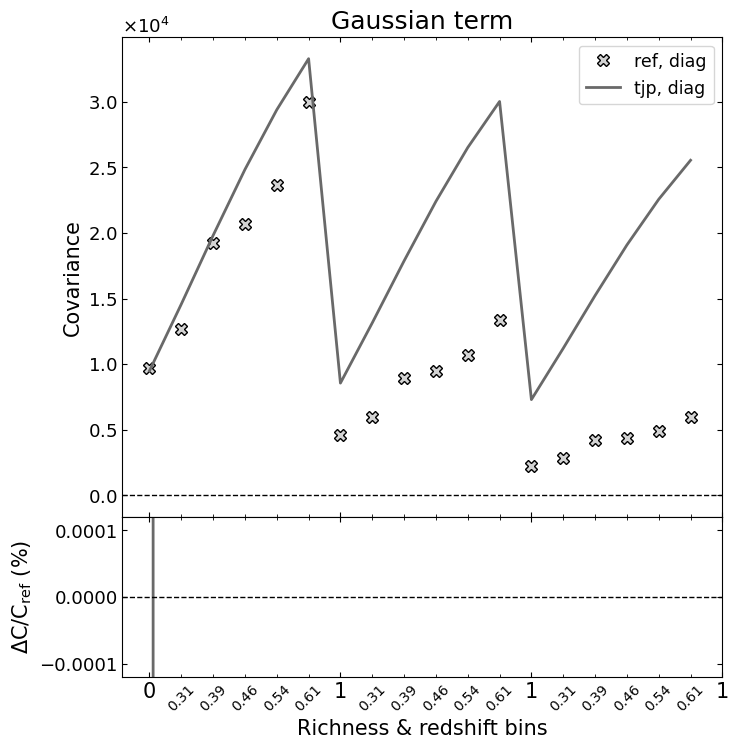

In [21]:
comparison_plot_func(cov_ref_gauss_005, cov_tjp_gauss_005,  
                     cvec  = ['lightgray','dimgray'], 
                     title = r'Gaussian term' , 
                     label = ['ref, diag', 'tjp, diag', 'ref, diag+1', 'tjp, diag+1'])

plt.ylim(-1.2e-4,1.2e-4)

(-0.00012, 0.00012)

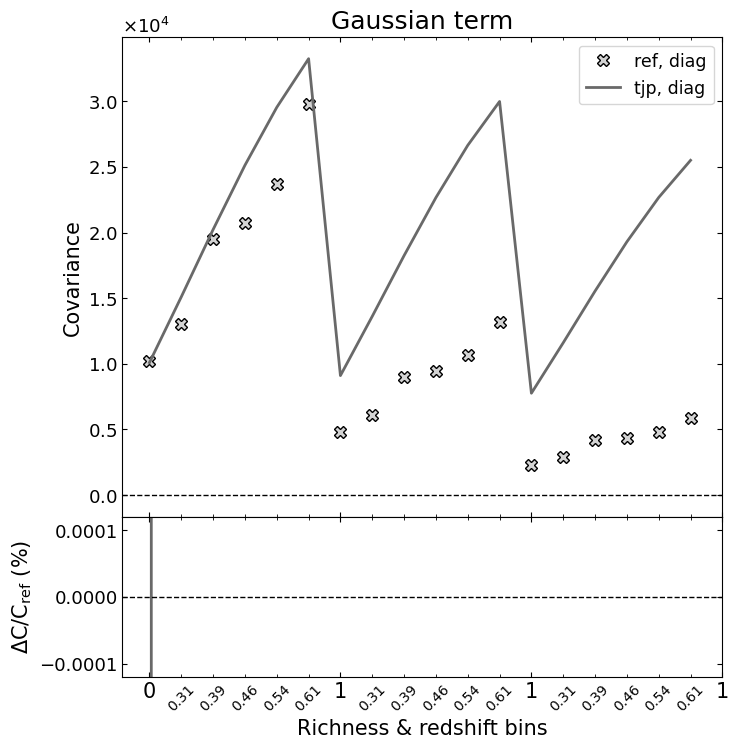

In [22]:
comparison_plot_func(cov_ref_gauss_05, cov_tjp_gauss_05,  
                     cvec  = ['lightgray','dimgray'], 
                     title = r'Gaussian term' , 
                     label = ['ref, diag', 'tjp, diag', 'ref, diag+1', 'tjp, diag+1'])

plt.ylim(-1.2e-4,1.2e-4)

## Validation: Super-sample covariance, small photo-z


(-0.0005, 0.00025)

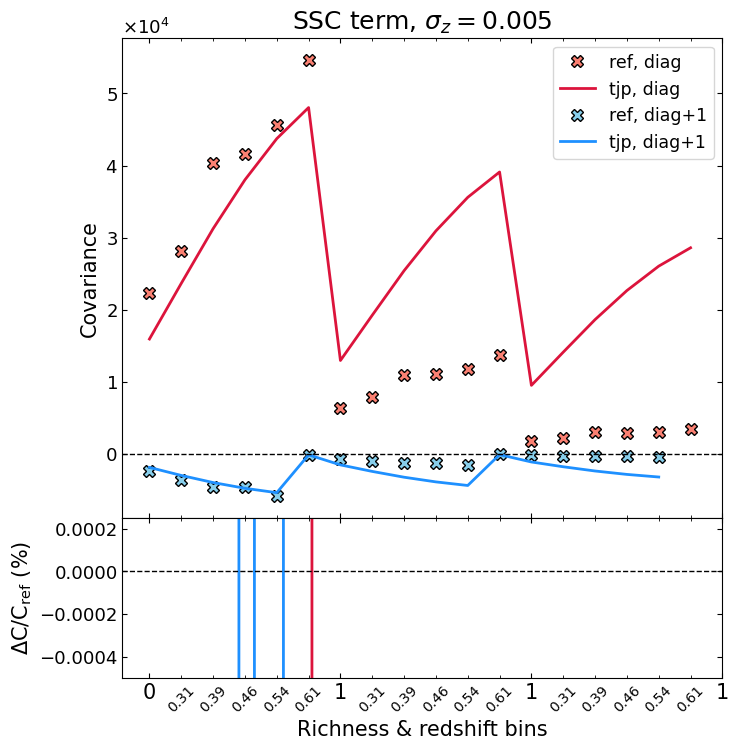

In [23]:
comparison_plot_func(cov_ref_ssc_005, cov_tjp_ssc_005,  
                     cvec=['salmon','crimson', 'skyblue','dodgerblue'], 
                     title=r'SSC term, $\sigma_z=0.005$' , 
                     label = ['ref, diag', 'tjp, diag', 'ref, diag+1', 'tjp, diag+1'])

plt.ylim(-5e-4,2.5e-4)

## Validation: Super-sample covariance, large photo-z

(-0.015, 0.05)

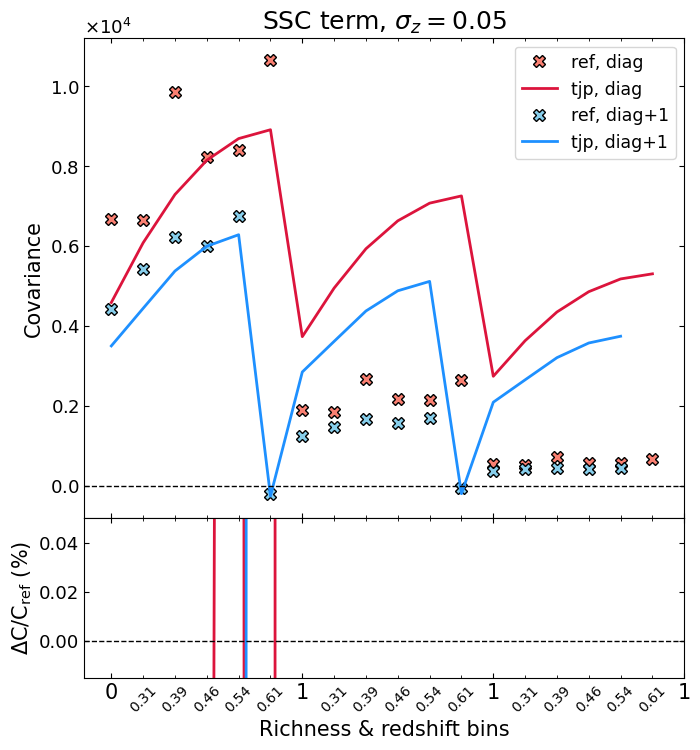

In [24]:
comparison_plot_func(cov_ref_ssc_05, cov_tjp_ssc_05,  
                     cvec=['salmon','crimson', 'skyblue','dodgerblue'], 
                     title=r'SSC term, $\sigma_z=0.05$', 
                     label = ['ref, diag', 'tjp, diag', 'ref, diag+1', 'tjp, diag+1'])

plt.ylim(-1.5e-2,5e-2)